# Enrichment Dataset with more Features

In [113]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_validate
from sklearn.linear_model import Ridge
from sklearn.impute import SimpleImputer

df_upgraded = pd.read_csv('/home/pikeblessed/proyecto_phnan/deploy-project-datascience/data/dataset_upgraded_phnan.csv', delimiter=';')
df_upgraded.head(1)

,date,format,comments,likes,reach,engagement,saved,shares,style,duration (seg),main_topic,voice_off
0,12/02/2024,1,23,152,1784,269,77,17,informative,18.0,basic photography,yes


In [11]:
df_upgraded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            95 non-null     object 
 1   format          95 non-null     int64  
 2   comments        95 non-null     int64  
 3   likes           95 non-null     int64  
 4   reach           95 non-null     int64  
 5   engagement      95 non-null     int64  
 6   saved           95 non-null     int64  
 7   shares          95 non-null     int64  
 8   style           95 non-null     object 
 9   duration (seg)  60 non-null     float64
 10  main_topic      95 non-null     object 
 11  voice_off       59 non-null     object 
dtypes: float64(1), int64(7), object(4)
memory usage: 9.0+ KB


### Distribution of the new features

<Axes: >

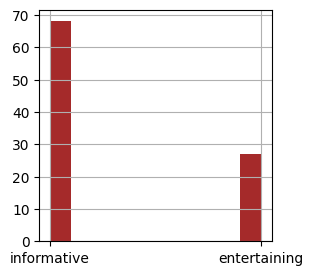

In [43]:
df_upgraded['style '].hist(figsize=(3,3), color='brown')

<Axes: >

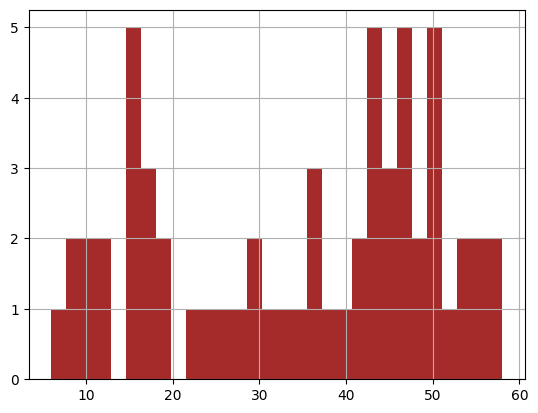

In [42]:
df_upgraded['duration (seg)'].hist(bins=30, color='brown')

<Axes: >

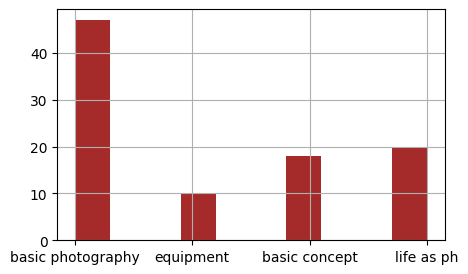

In [44]:
df_upgraded['main_topic'].hist(figsize=(5,3), color='brown')

<Axes: >

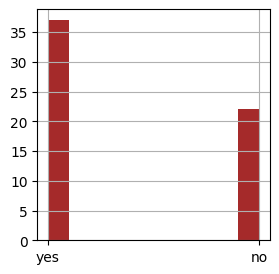

In [40]:
df_upgraded['voice_off'].hist(figsize=(3,3), color='brown')

In [52]:
#encoding categorical features
encoder = LabelEncoder()
df_upgraded_encoder = df_upgraded.copy() #copy of df
columns = ['style ', 'main_topic', 'voice_off'] #columns to encode
df_upgraded_encoder[columns] = df_upgraded_encoder[columns].apply(lambda col: encoder.fit_transform(col)) #encoding
df = df_upgraded_encoder
df.head()

,date,format,comments,likes,reach,engagement,saved,shares,style,duration (seg),main_topic,voice_off
0,12/02/2024,1,23,152,1784,269,77,17,1,18.0,1,1
1,11/02/2024,1,5,111,1742,152,30,6,1,15.0,2,1
2,10/02/2024,1,6,161,2525,262,81,14,1,49.0,1,0
3,09/02/2024,3,8,276,4061,574,252,38,1,NaN,0,2
4,08/02/2024,1,59,425,5498,582,79,19,0,11.0,3,1


In [58]:
df['duration (seg)'].describe()

count    60.000000
mean     34.750000
std      15.492617
min       6.000000
25%      18.750000
50%      39.000000
75%      47.000000
max      58.000000
Name: duration (seg), dtype: float64

In [62]:
#impute media value for Nan
df = df.drop('date', axis=1)
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
values = imputer.fit_transform(df)

In [65]:
#convert to DataFrame
df = pd.DataFrame(values, columns=df.columns, index=df.index)
df.head()

,format,comments,likes,reach,engagement,saved,shares,style,duration (seg),main_topic,voice_off
0,1.0,23.0,152.0,1784.0,269.0,77.0,17.0,1.0,18.00,1.0,1.0
1,1.0,5.0,111.0,1742.0,152.0,30.0,6.0,1.0,15.00,2.0,1.0
2,1.0,6.0,161.0,2525.0,262.0,81.0,14.0,1.0,49.00,1.0,0.0
3,3.0,8.0,276.0,4061.0,574.0,252.0,38.0,1.0,34.75,0.0,2.0
4,1.0,59.0,425.0,5498.0,582.0,79.0,19.0,0.0,11.00,3.0,1.0


In [132]:
#remove features and target feature
X = df.drop(['engagement', 'reach'], axis=1)
y = df['reach']

In [129]:
#best model
model = Ridge(alpha=100, solver='saga', max_iter=100000)

In [133]:
#cross validation
cv = cross_validate(model, X, y, cv=10, return_train_score=True)

In [134]:
#model results
print(cv['train_score'].mean())
print(cv['test_score'].mean())

0.916728668136181
0.7173231692092715
